<a href="https://colab.research.google.com/github/saamirkc/DeepLearning/blob/main/BackPropagation/mnistclassification2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

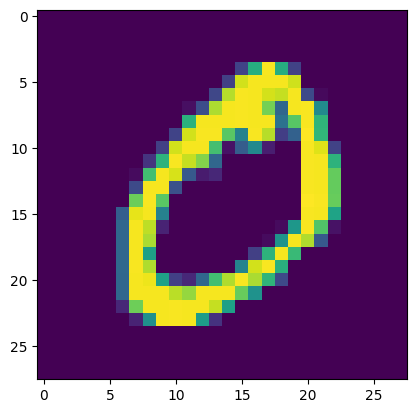

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1])

In [11]:
X_train=X_train/255
X_test=X_test/255

In [12]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [28]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [37]:
history=model.fit(X_train,y_train,epochs=15,validation_split=0.2)

Epoch 1/15
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0097 - accuracy: 0.9967 - val_loss: 0.1334 - val_accuracy: 0.9761
Epoch 2/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0101 - accuracy: 0.9965 - val_loss: 0.1359 - val_accuracy: 0.9758
Epoch 3/15
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0123 - accuracy: 0.9960 - val_loss: 0.1284 - val_accuracy: 0.9759
Epoch 4/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0080 - accuracy: 0.9973 - val_loss: 0.1436 - val_accuracy: 0.9748
Epoch 5/15
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0085 - accuracy: 0.9973 - val_loss: 0.1537 - val_accuracy: 0.9740
Epoch 6/15
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0103 - accuracy: 0.9965 - val_loss: 0.1432 - val_accuracy: 0.9768
Epoch 7/15
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0081 - accuracy: 0.9972 - val_loss: 0.1734 - val_accuracy

In [39]:
y_prob=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [40]:
y_pred=y_prob.argmax(axis=1)

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9761

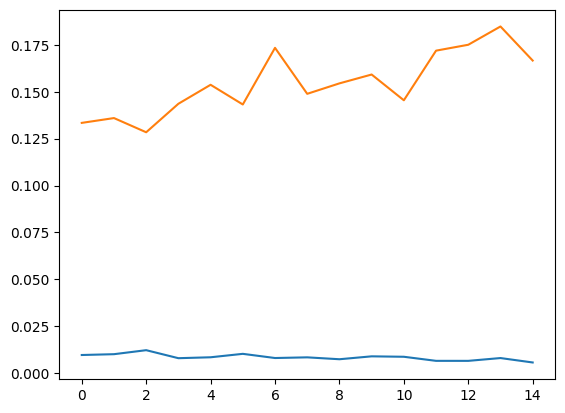

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

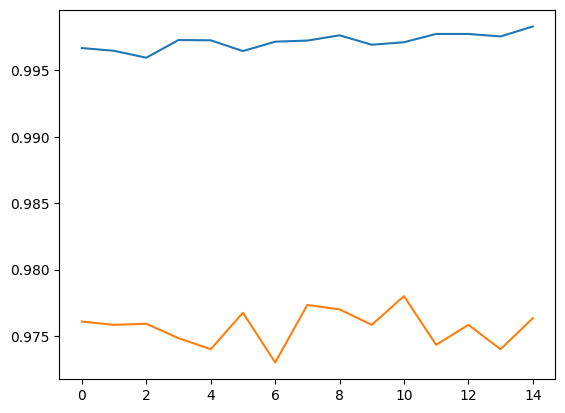

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [44]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

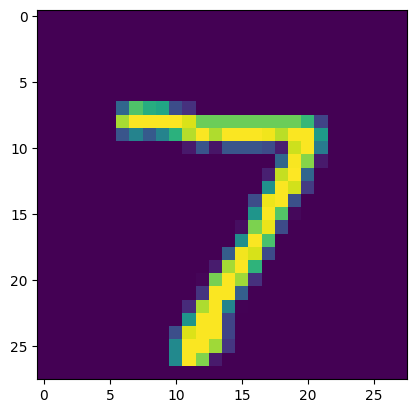

In [45]:
plt.imshow(X_test[0])

In [46]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 46ms/step


array([7])